In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("Monkeypox Skin Image Dataset"))


['Chickenpox', 'Measles', 'Monkeypox', 'Normal']


In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Input, Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16

In [3]:
PATH = os.getcwd()
print(PATH)
PATH = 'Monkeypox Skin Image Dataset'
print(os.listdir(PATH))
data_dir_list = os.listdir(PATH)
print(data_dir_list)

E:\4th Year\2nd Sem\DL\project\Skin diseases\dataset
['Chickenpox', 'Measles', 'Monkeypox', 'Normal']
['Chickenpox', 'Measles', 'Monkeypox', 'Normal']


In [4]:
img_rows=224
img_cols=224
num_channel=3

num_epoch = 5
batch_size = 32

img_data_list=[]
classes_names_list=[]
target_column=[]

In [5]:
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting images from {} folder\n".format(dataset))
    img_list = os.listdir(PATH+'/'+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH + '/' + dataset + '/' + img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting images from Chickenpox folder

Getting images from Measles folder

Getting images from Monkeypox folder

Getting images from Normal folder



In [6]:
# Checking the number of classed present 
num_classes = len(classes_names_list)
print(num_classes)

4


In [7]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print(img_data.shape)

(770, 224, 224, 3)


In [8]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

In [9]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([0, 1, 2, 3], dtype=int64)

In [10]:
# Shuffle the images and do a test train split 
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.3,random_state=2)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=2)

In [11]:
first_Mod = Sequential()

first_Mod.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
first_Mod.add(Conv2D(64,(3,3),activation='relu'))
first_Mod.add(MaxPool2D(pool_size=(2,2)))
first_Mod.add(Dropout(0.5))

first_Mod.add(Conv2D(128,(3,3),activation='relu'))
first_Mod.add(Conv2D(128,(3,3),activation='relu'))
first_Mod.add(MaxPool2D(pool_size=(2,2)))
first_Mod.add(Dropout(0.5))

first_Mod.add(Flatten())
first_Mod.add(Dense(128,activation='relu'))
first_Mod.add(Dropout(0.5))
first_Mod.add(Dense(num_classes,activation='softmax'))

In [12]:
#Compile the model
first_Mod.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
first_Mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                        

In [13]:
num_epoch = 10  # Increase the number of epochs to 10
hist = first_Mod.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))
score = first_Mod.evaluate(X_test,y_test,batch_size=batch_size)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

Epoch 1/10
17/17 [==============================] - 250s 14s/step - loss: 3.9639 - accuracy: 0.3636 - val_loss: 1.2984 - val_accuracy: 0.3230
Epoch 2/10
17/17 [==============================] - 237s 14s/step - loss: 1.2808 - accuracy: 0.4100 - val_loss: 1.3671 - val_accuracy: 0.4534
Epoch 3/10
17/17 [==============================] - 231s 14s/step - loss: 1.2840 - accuracy: 0.4007 - val_loss: 1.3025 - val_accuracy: 0.3230
Epoch 4/10
17/17 [==============================] - 220s 13s/step - loss: 1.2509 - accuracy: 0.3840 - val_loss: 1.2939 - val_accuracy: 0.3230
Epoch 5/10
17/17 [==============================] - 225s 13s/step - loss: 1.2294 - accuracy: 0.4156 - val_loss: 1.2662 - val_accuracy: 0.3602
Epoch 6/10
17/17 [==============================] - 211s 12s/step - loss: 1.1972 - accuracy: 0.4545 - val_loss: 1.2511 - val_accuracy: 0.4286
Epoch 7/10
17/17 [==============================] - 191s 11s/step - loss: 1.1845 - accuracy: 0.4898 - val_loss: 1.2346 - val_accuracy: 0.4720
Epoch 

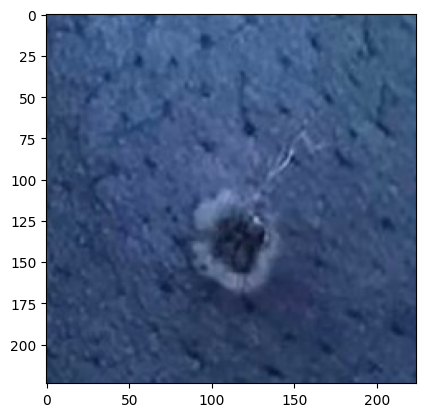

In [14]:
test_image = X_test[0:1]
plt.imshow(X_test[5])

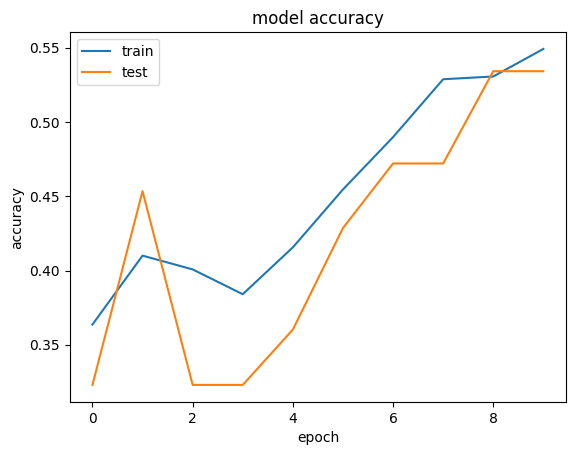

In [15]:
# Summarize hist for accuracy
plt.plot(hist.history['accuracy'])  # 'accuracy' instead of 'acc'
plt.plot(hist.history['val_accuracy'])  # 'val_accuracy' instead of 'val_acc'
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


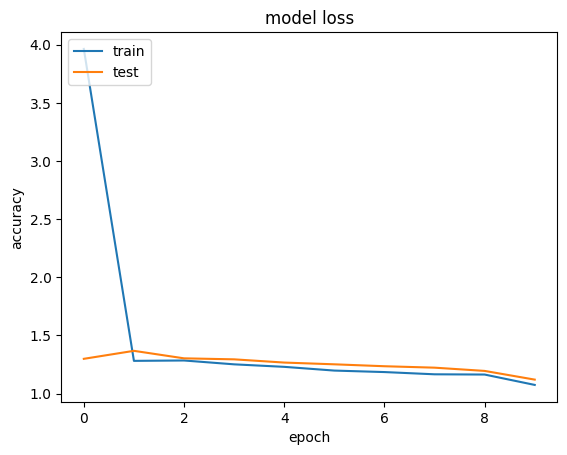

In [16]:
#summarize hist for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [17]:
data_gen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.5, 
    zoom_range=0.4, 
    rescale=1./255,
    vertical_flip=True, 
    validation_split=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

TRN_AUGMENTED = os.path.join(PATH)
TST_AUGMENTED = os.path.join(PATH)

In [18]:
ftrain_generator = data_gen.flow(X_train,y_train,batch_size=batch_size,shuffle=True,subset='training')
ftest_generator = data_gen.flow(X_test,y_test,batch_size=batch_size,shuffle=True,subset='validation')

In [19]:
first_Mod.fit_generator(ftrain_generator,epochs=num_epoch,validation_data=ftest_generator,workers=6)

C:\Users\HP\AppData\Local\Temp\ipykernel_15120\2522768376.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  first_Mod.fit_generator(ftrain_generator,epochs=num_epoch,validation_data=ftest_generator,workers=6)


Epoch 1/10
14/14 [==============================] - 152s 11s/step - loss: 1.3811 - accuracy: 0.3426 - val_loss: 1.3574 - val_accuracy: 0.3125
Epoch 2/10
14/14 [==============================] - 162s 11s/step - loss: 1.3298 - accuracy: 0.3912 - val_loss: 1.3493 - val_accuracy: 0.3125
Epoch 3/10
14/14 [==============================] - 153s 11s/step - loss: 1.3494 - accuracy: 0.3449 - val_loss: 1.3379 - val_accuracy: 0.3125
Epoch 4/10
14/14 [==============================] - 153s 11s/step - loss: 1.3408 - accuracy: 0.3449 - val_loss: 1.3241 - val_accuracy: 0.3125
Epoch 5/10
14/14 [==============================] - 149s 10s/step - loss: 1.3355 - accuracy: 0.3449 - val_loss: 1.3125 - val_accuracy: 0.3125
Epoch 6/10
14/14 [==============================] - 148s 11s/step - loss: 1.3270 - accuracy: 0.3449 - val_loss: 1.3025 - val_accuracy: 0.3125
Epoch 7/10
14/14 [==============================] - 160s 11s/step - loss: 1.3158 - accuracy: 0.3449 - val_loss: 1.2918 - val_accuracy: 0.3125
Epoch 

In [20]:
first_Mod.evaluate_generator(ftest_generator,verbose=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_15120\3835653294.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  first_Mod.evaluate_generator(ftest_generator,verbose=1)


1/1 [==============================] - 3s 3s/step - loss: 1.2654 - accuracy: 0.3125


[1.2654032707214355, 0.3125]

In [21]:
train_fdata_predict = first_Mod.predict_generator(ftest_generator,verbose=1)
train_fdata_predict.argmax(axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_15120\2818381771.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  train_fdata_predict = first_Mod.predict_generator(ftest_generator,verbose=1)


1/1 [==============================] - 3s 3s/step


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

6/6 [==============================] - 12s 2s/step
[0.18078633 0.18991463 0.34294587 0.28635323]
2


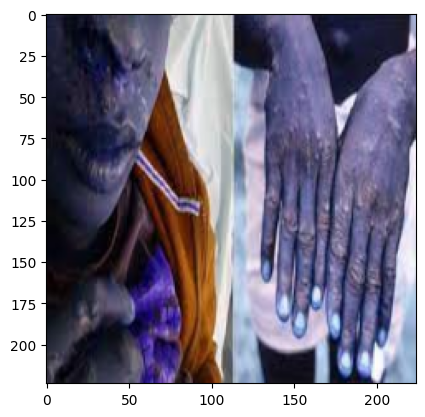

In [22]:
Y_pred = first_Mod.predict(X_test)
print(Y_pred[10])
plt.imshow(X_test[10])

y_pred=np.argmax(Y_pred,axis=1)
print(y_pred[10])

In [23]:
train_generator = data_gen.flow_from_directory(
        PATH,
        target_size=(img_rows, img_cols), 
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb', 
        shuffle=True,  
        #save_to_dir=TRN_AUGMENTED, 
        #save_prefix='TrainAugmented', 
        #save_format='png', 
        subset="training")

Found 618 images belonging to 4 classes.


In [24]:
train_generator.class_indices

{'Chickenpox': 0, 'Measles': 1, 'Monkeypox': 2, 'Normal': 3}

In [25]:
test_generator = data_gen.flow_from_directory(
        PATH,
        target_size=(img_rows, img_cols),
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb', 
        shuffle=True, 
        seed=None, 
        #save_to_dir=TST_AUGMENTED, 
        #save_prefix='TestAugmented', 
        #save_format='png',
        subset="validation")

Found 152 images belonging to 4 classes.


In [26]:
first_Mod.fit_generator(train_generator,epochs=num_epoch,validation_data=test_generator)
fd_model_evaluate = first_Mod.evaluate_generator(test_generator,verbose=1)
print("Loss: ", fd_model_evaluate[0], "Accuracy: ", fd_model_evaluate[1])

C:\Users\HP\AppData\Local\Temp\ipykernel_15120\1519370831.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  first_Mod.fit_generator(train_generator,epochs=num_epoch,validation_data=test_generator)


Epoch 1/10
20/20 [==============================] - 234s 12s/step - loss: 1.2934 - accuracy: 0.3625 - val_loss: 1.2858 - val_accuracy: 0.3618
Epoch 2/10
20/20 [==============================] - 229s 11s/step - loss: 1.2870 - accuracy: 0.3592 - val_loss: 1.2810 - val_accuracy: 0.3618
Epoch 3/10
20/20 [==============================] - 218s 11s/step - loss: 1.2816 - accuracy: 0.3657 - val_loss: 1.2771 - val_accuracy: 0.3618
Epoch 4/10
20/20 [==============================] - 227s 11s/step - loss: 1.2768 - accuracy: 0.3867 - val_loss: 1.2738 - val_accuracy: 0.3618
Epoch 5/10
20/20 [==============================] - 230s 11s/step - loss: 1.2740 - accuracy: 0.3754 - val_loss: 1.2708 - val_accuracy: 0.3618
Epoch 6/10
20/20 [==============================] - 219s 11s/step - loss: 1.2757 - accuracy: 0.3463 - val_loss: 1.2688 - val_accuracy: 0.3618
Epoch 7/10
20/20 [==============================] - 253s 13s/step - loss: 1.2678 - accuracy: 0.3900 - val_loss: 1.2670 - val_accuracy: 0.3618
Epoch 

C:\Users\HP\AppData\Local\Temp\ipykernel_15120\1519370831.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  fd_model_evaluate = first_Mod.evaluate_generator(test_generator,verbose=1)


5/5 [==============================] - 13s 2s/step - loss: 1.2640 - accuracy: 0.3618
Loss:  1.2640317678451538 Accuracy:  0.3618420958518982


In [27]:
fd_model_predict = first_Mod.predict_generator(test_generator,verbose=1)
fd_model_predict.argmax(axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_15120\4205974570.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  fd_model_predict = first_Mod.predict_generator(test_generator,verbose=1)


5/5 [==============================] - 11s 2s/step


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [28]:
image_input = Input(shape=(img_rows,img_cols,num_channel))
vgg_mod = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
vgg_mod.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [29]:
last_layer = vgg_mod.get_layer('fc2').output
out = Dense(num_classes,activation='softmax',name='output')(last_layer)

In [30]:
cust_vgg_model = Model(image_input,out)
cust_vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
for layer in cust_vgg_model.layers[:-1]:
    layer.trainable = False
cust_vgg_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [32]:
hist_1=cust_vgg_model.fit(X_train,y_train,batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_test, y_test))

Epoch 1/5
17/17 [==============================] - 179s 11s/step - loss: 1.5851 - accuracy: 0.3210 - val_loss: 1.1414 - val_accuracy: 0.5839
Epoch 2/5
17/17 [==============================] - 181s 11s/step - loss: 1.0751 - accuracy: 0.6234 - val_loss: 1.0577 - val_accuracy: 0.5776
Epoch 3/5
17/17 [==============================] - 173s 10s/step - loss: 0.9531 - accuracy: 0.6494 - val_loss: 1.0761 - val_accuracy: 0.6211
Epoch 4/5
17/17 [==============================] - 176s 11s/step - loss: 0.9107 - accuracy: 0.6642 - val_loss: 0.9732 - val_accuracy: 0.6522
Epoch 5/5
17/17 [==============================] - 173s 10s/step - loss: 0.8874 - accuracy: 0.6753 - val_loss: 0.9647 - val_accuracy: 0.6273


In [33]:
Y_test_pred = cust_vgg_model.predict(X_test)
y_test_pred = np.argmax(Y_test_pred,axis=1)

6/6 [==============================] - 40s 6s/step


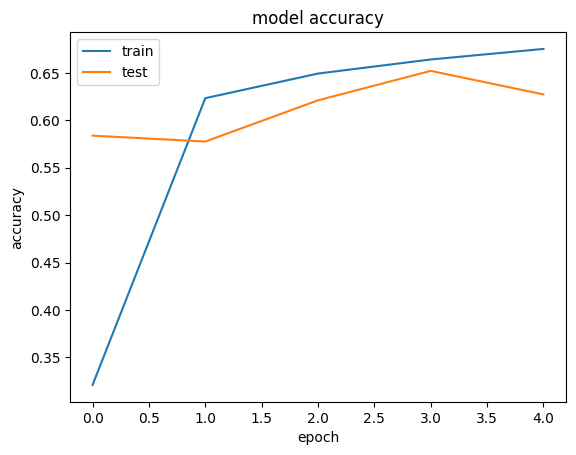

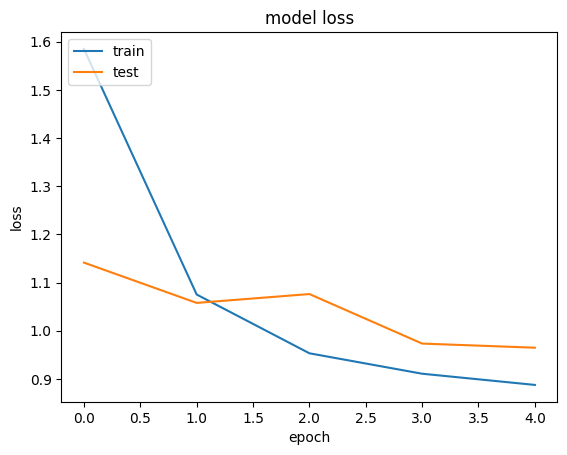

In [35]:
# Summarize hist for accuracy
plt.plot(hist_1.history['accuracy'])  # 'accuracy' instead of 'acc'
plt.plot(hist_1.history['val_accuracy'])  # 'val_accuracy' instead of 'val_acc'
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize hist for loss
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')  # Change 'accuracy' to 'loss' for the y-axis label
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [36]:
random_image_path = 'test.png'

# Load and preprocess the image for prediction
img = cv2.imread(random_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB if needed
img = cv2.resize(img, (224, 224))  # Adjust the target size as needed
img = img / 255.0  # Normalize the image (assuming your model was trained with normalized data)
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make predictions using your model
predictions = cust_vgg_model.predict(img)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Print the predicted class
print(f"Predicted Class Index: {predicted_class}")

# If you have a list of class labels, you can map the index to the class name
class_labels = ["Chickenpox", "Measles", "Monkeypox", "Normal"]  # Replace with your actual class labels
predicted_class_name = class_labels[predicted_class]

print(f"Predicted Class: {predicted_class_name}")

1/1 [==============================] - 0s 310ms/step
Predicted Class Index: 2
Predicted Class: Monkeypox
